In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('data/상권-추정매출_업종재분류_시계열.csv', encoding='cp949')

## 행정구 별 그래프

In [ ]:
gu_grouped = sales_df.groupby('시군구_명').sum().reset_index()

In [6]:
gu_grouped.describe()

,상권_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,...,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,2.023558e+09,1.294828e+08,2.923646e+08,7.435295e+06,7.435698e+09,8.156835e+11,8.575813e+11,8.647657e+11,8.591488e+11,8.422693e+11,...,7.459811e+11,6.880431e+11,7.466444e+11,7.158909e+11,7.915883e+11,7.080724e+11,7.882133e+11,7.785382e+11,8.181900e+11,7.904504e+11
std,4.920123e+08,3.253168e+07,6.948395e+07,1.882888e+06,1.882982e+09,6.138411e+11,6.268371e+11,6.331232e+11,6.282736e+11,6.255367e+11,...,5.766045e+11,5.292096e+11,5.719088e+11,5.445465e+11,5.999743e+11,5.479542e+11,5.976670e+11,5.987501e+11,6.200901e+11,6.097310e+11
min,1.241194e+09,8.109031e+07,1.844778e+08,4.516680e+06,4.516927e+09,2.582005e+11,2.877692e+11,2.951508e+11,2.818196e+11,2.791335e+11,...,2.219728e+11,2.088598e+11,2.295081e+11,2.278458e+11,2.331493e+11,2.145194e+11,2.305183e+11,2.320494e+11,2.327798e+11,2.169959e+11
25%,1.698277e+09,1.063485e+08,2.459935e+08,6.216740e+06,6.217058e+09,4.406634e+11,4.788674e+11,4.654281e+11,4.615135e+11,4.422893e+11,...,3.920734e+11,3.494222e+11,4.141462e+11,3.779263e+11,3.864649e+11,3.463517e+11,3.974001e+11,3.888679e+11,4.207051e+11,3.464995e+11
50%,1.945376e+09,1.250610e+08,2.826000e+08,7.188815e+06,7.189325e+09,6.305051e+11,6.626086e+11,6.445998e+11,6.773296e+11,6.539552e+11,...,5.859213e+11,5.598734e+11,5.970109e+11,5.747470e+11,6.174460e+11,5.551845e+11,6.033588e+11,5.923522e+11,6.301744e+11,5.725555e+11
75%,2.318488e+09,1.434956e+08,3.354739e+08,8.523950e+06,8.524449e+09,9.031500e+11,9.625269e+11,9.733442e+11,9.605183e+11,9.342674e+11,...,8.789977e+11,7.961221e+11,8.796431e+11,7.956350e+11,1.002308e+12,8.448907e+11,9.993271e+11,9.768649e+11,1.091192e+12,9.851293e+11
max,3.490125e+09,2.286806e+08,4.985072e+08,1.308160e+07,1.308227e+10,3.009331e+12,3.079155e+12,3.094718e+12,3.067198e+12,3.010542e+12,...,2.750163e+12,2.538892e+12,2.797873e+12,2.624763e+12,2.910968e+12,2.679196e+12,2.977482e+12,2.975746e+12,3.040257e+12,2.917406e+12


In [7]:
timestamps = [f"{year}-Q{quarter}" for year in range(2019, 2023) for quarter in range(1, 5)] + ["2023-Q1"]

In [8]:
# 한글 깨짐 방지
plt.rc("font", family="Noto Sans CJK KR")

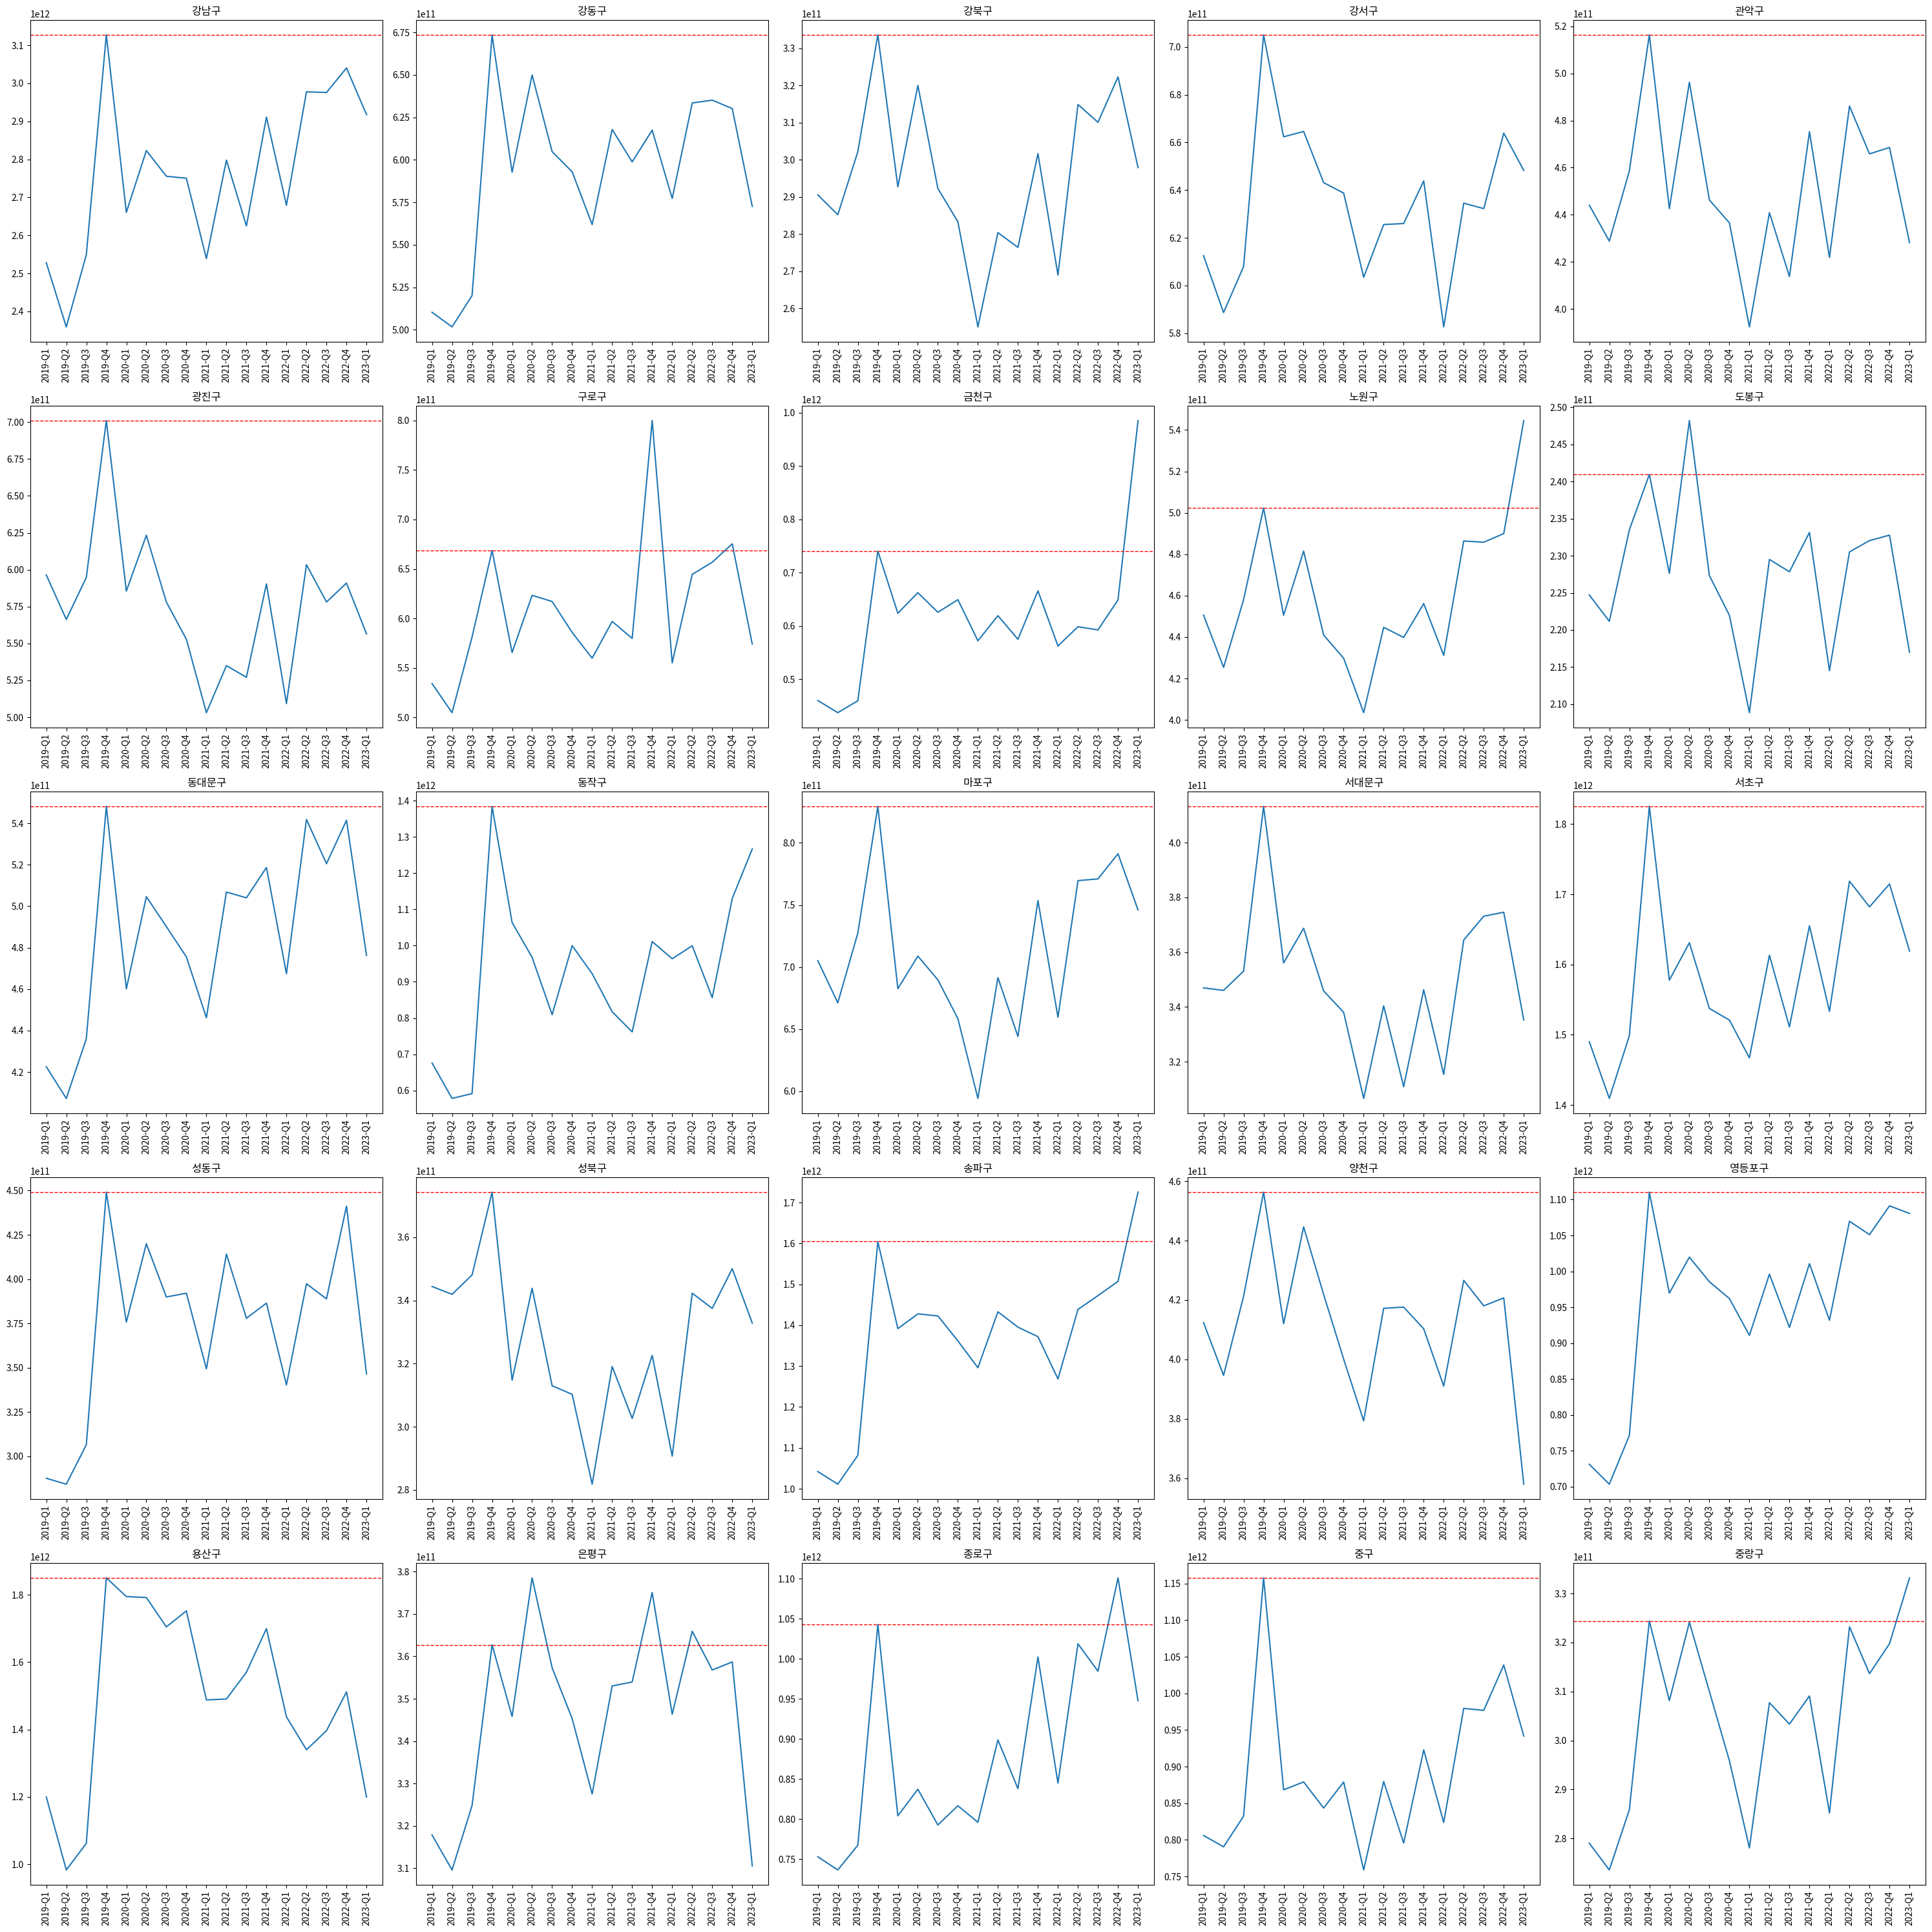

In [9]:
# 5x5 그래프 

fig, axes = plt.subplots(5, 5, figsize=(30, 30))
gu_names = gu_grouped['시군구_명'].unique()

for i, gu_name in enumerate(gu_names):
    x, y = divmod(i, 5)
    ax = axes[x, y]

    ax.set_title(gu_name)
    ax.plot(timestamps, gu_grouped[gu_grouped['시군구_명'] == gu_name][timestamps].values[0])

    # 기준선: 코로나 이전 (2019-Q4) 매출액
    ax.axhline(gu_grouped[gu_grouped['시군구_명'] == gu_name]['2019-Q4'].values[0], color='red', linestyle='--', linewidth=1)
    
    # x축 라벨 회전
    ax.tick_params(axis='x', rotation=90)    

plt.tight_layout()
plt.show()

## 업종별 그래프

In [ ]:
cls_grouped = sales_df.groupby('업종_재분류').sum().reset_index()

In [11]:
cls_grouped.describe()

,상권_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,...,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,2.975821e+09,1.904159e+08,4.299479e+08,1.093426e+07,1.093485e+10,1.199534e+12,1.261149e+12,1.271714e+12,1.263454e+12,1.238631e+12,...,1.097031e+12,1.011828e+12,1.098006e+12,1.052781e+12,1.164100e+12,1.041283e+12,1.159137e+12,1.144909e+12,1.203221e+12,1.162427e+12
std,8.644926e+08,5.525168e+07,1.250346e+08,3.176872e+06,3.177046e+09,1.452240e+12,1.499775e+12,1.510131e+12,1.522716e+12,1.453795e+12,...,1.207610e+12,1.099450e+12,1.232823e+12,1.121338e+12,1.331770e+12,1.163884e+12,1.442537e+12,1.420447e+12,1.513392e+12,1.420129e+12
min,7.291089e+08,4.646997e+07,1.048356e+08,2.683770e+06,2.683912e+09,5.404241e+10,6.416412e+10,5.970945e+10,6.772577e+10,7.935541e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.776878e+09,1.777162e+08,4.011754e+08,1.020325e+07,1.020380e+10,2.407377e+11,2.868365e+11,2.951603e+11,2.639515e+11,2.704759e+11,...,1.377210e+11,1.195829e+11,1.498260e+11,1.248623e+11,1.623353e+11,1.240356e+11,1.950667e+11,1.993455e+11,2.033877e+11,1.907762e+11
50%,2.972885e+09,1.902671e+08,4.295427e+08,1.092526e+07,1.092585e+10,1.025128e+12,1.095688e+12,1.110775e+12,1.054199e+12,1.102868e+12,...,6.613266e+11,6.017112e+11,6.507209e+11,7.029484e+11,6.656429e+11,6.547814e+11,7.006053e+11,6.923651e+11,6.824700e+11,7.527032e+11
75%,3.557717e+09,2.276398e+08,5.141930e+08,1.306929e+07,1.307000e+10,1.507340e+12,1.491417e+12,1.532662e+12,1.489541e+12,1.511899e+12,...,1.763070e+12,1.651405e+12,1.788577e+12,1.780485e+12,1.816335e+12,1.882575e+12,1.774314e+12,1.819497e+12,1.805966e+12,1.587008e+12
max,4.120747e+09,2.635306e+08,5.954830e+08,1.513872e+07,1.513954e+10,6.226645e+12,6.455007e+12,6.515369e+12,6.526692e+12,6.225969e+12,...,4.449063e+12,4.013208e+12,4.801799e+12,4.151647e+12,5.133359e+12,4.357139e+12,5.854108e+12,5.756620e+12,6.092018e+12,5.640493e+12


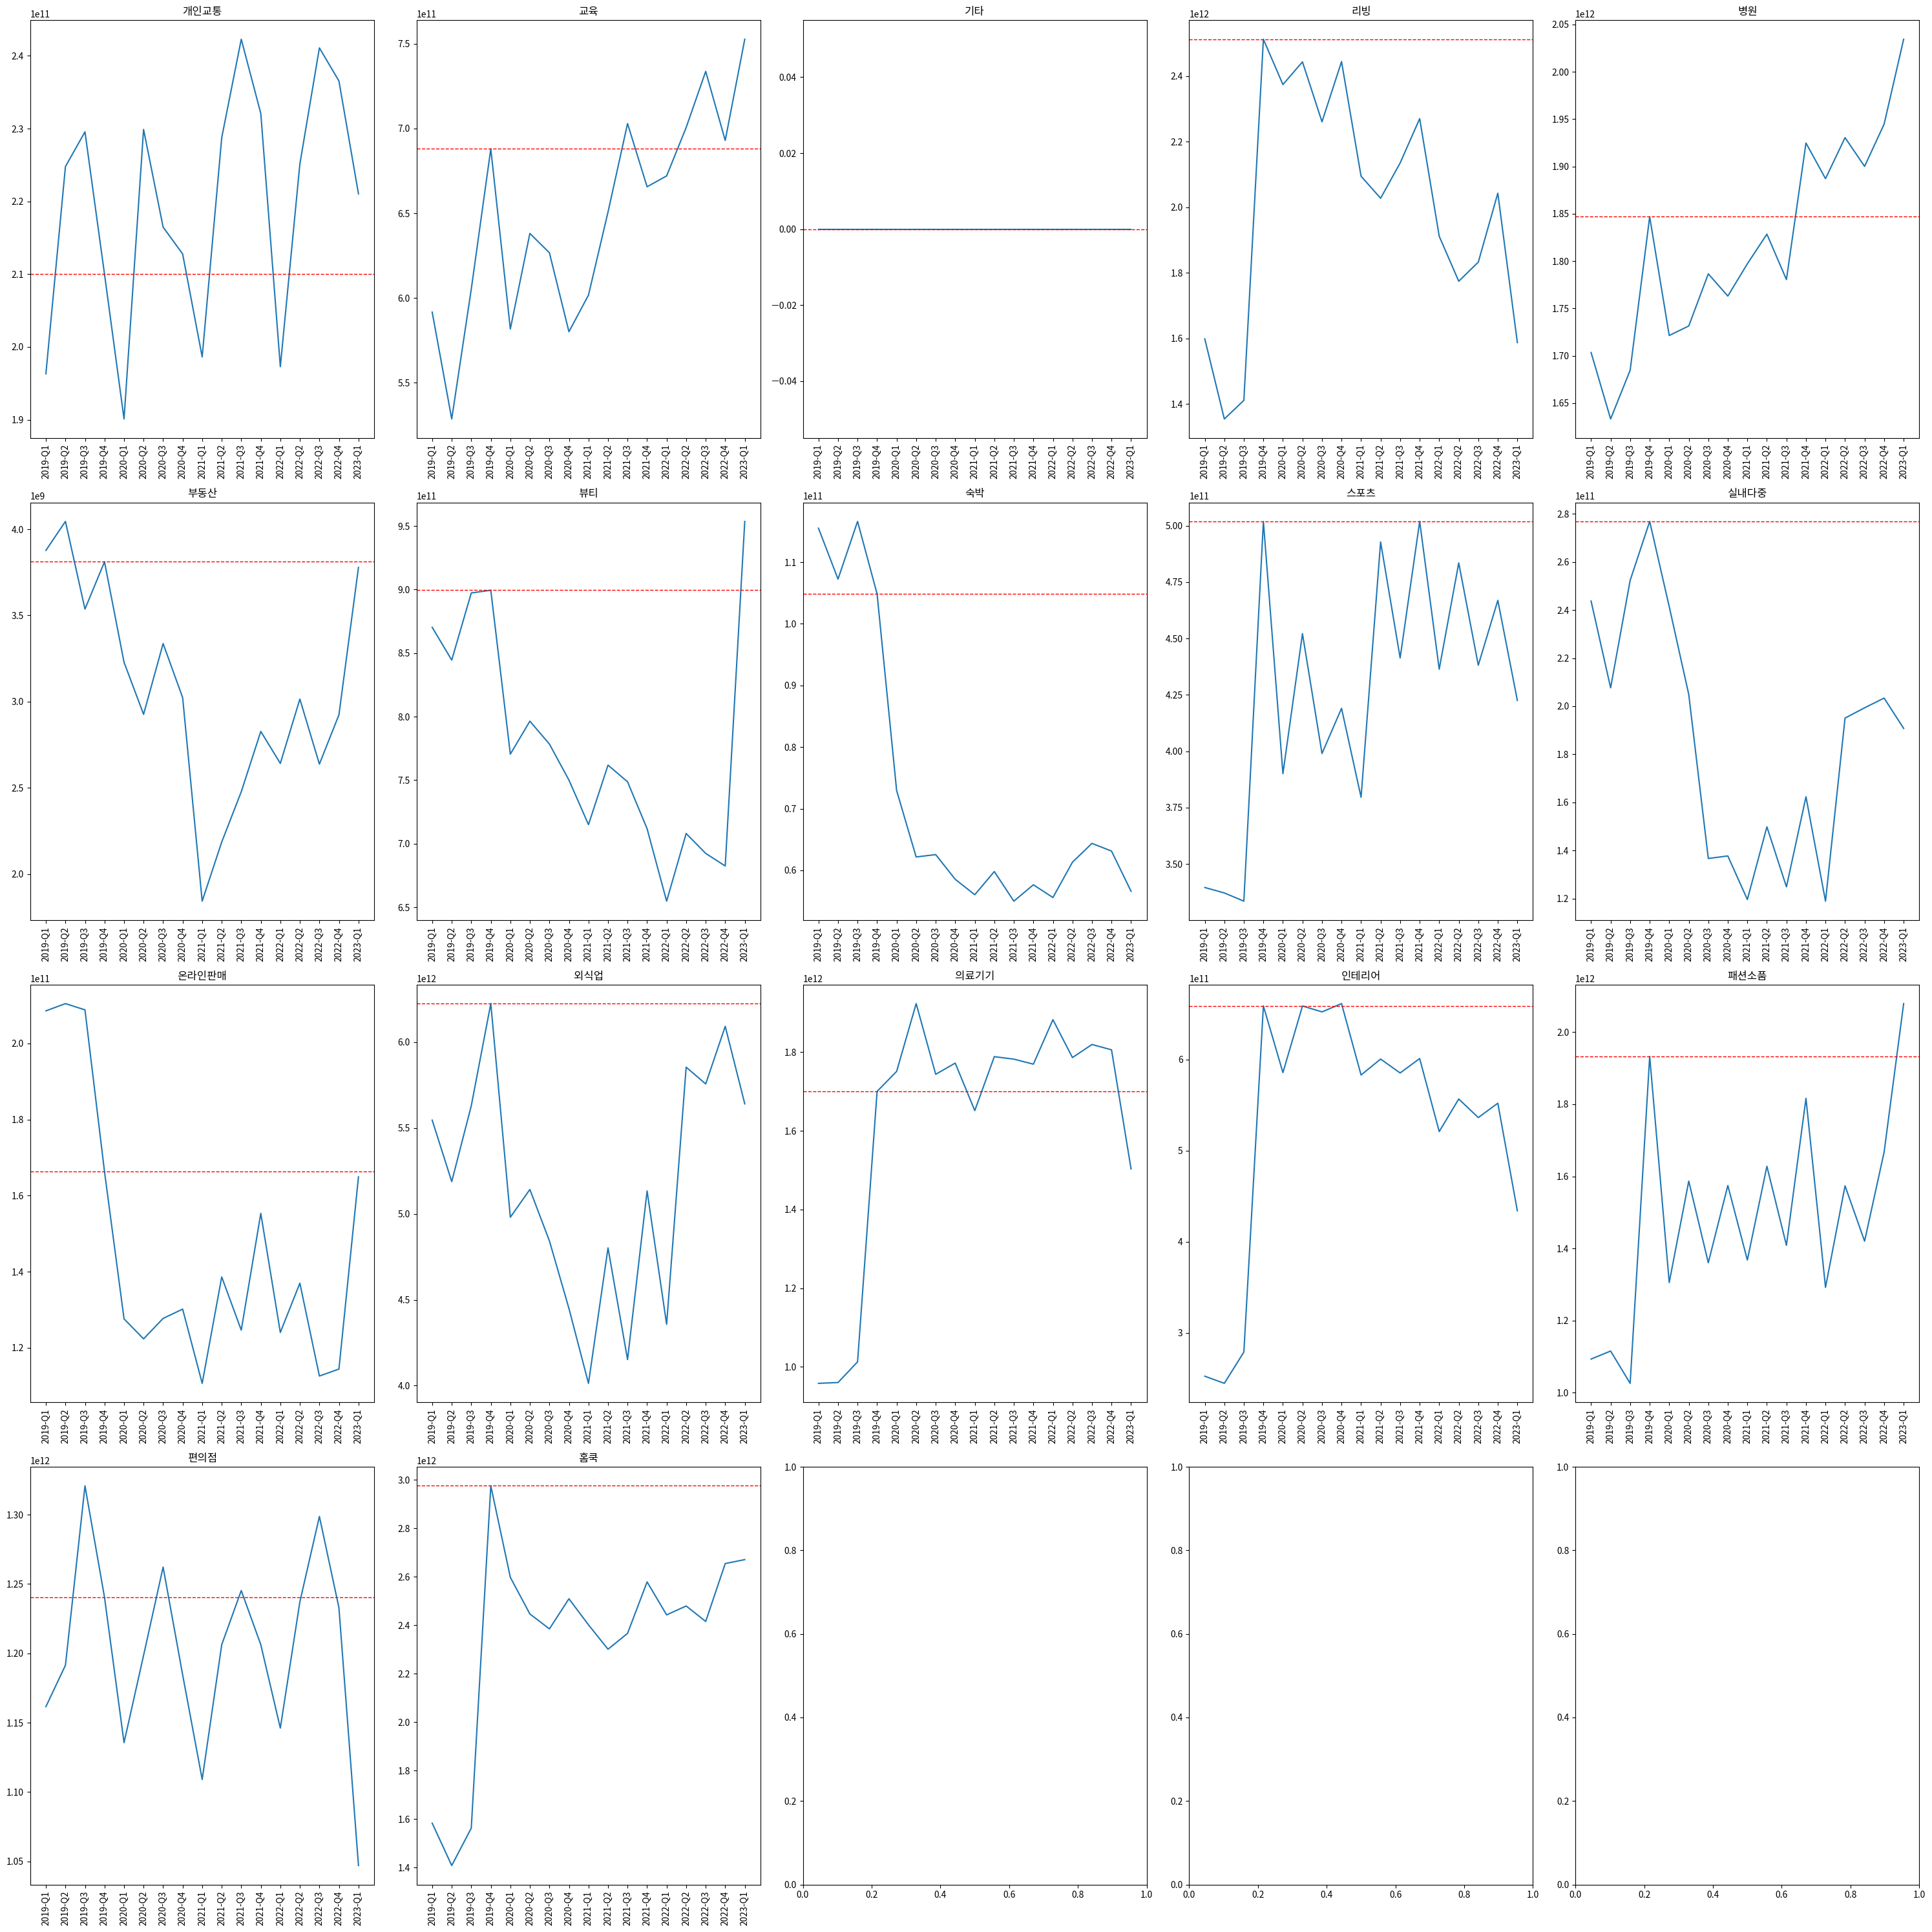

In [12]:
# 4x5 그래프 

fig, axes = plt.subplots(4, 5, figsize=(30, 30))
cls_names = cls_grouped['업종_재분류'].unique()

for i, cls_name in enumerate(cls_names):
    x, y = divmod(i, 5)
    ax = axes[x, y]

    ax.set_title(cls_name)
    ax.plot(timestamps, cls_grouped[cls_grouped['업종_재분류'] == cls_name][timestamps].values[0])

    # 기준선: 코로나 이전 (2019-Q4) 매출액
    ax.axhline(cls_grouped[cls_grouped['업종_재분류'] == cls_name]['2019-Q4'].values[0], color='red', linestyle='--', linewidth=1)
    
    # x축 라벨 회전
    ax.tick_params(axis='x', rotation=90)    

plt.tight_layout()
plt.show()